In [129]:
### WOW... it worked somehow.. 

# Import need libraries
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd # Import pandas module
import yfinance as yf

# Defining the object of and attributes of the GUI
class StockPortfolioTracker:
    def __init__(self, root):
        self.root = root
        self.root.title("Investinspect")  # Set the window title
        self.stocks = {}
        
        # Create title label
        #self.title_label = tk.Label(root, text="The Pulse of your Investment Portfolio", font=('Arial', 17))
        #self.title_label.grid(row=0, column=0, columnspan=2)
        
        # Create labels
        self.stock_label = tk.Label(root, text="Stock Symbol:")
        self.stock_label.grid(row=0, column=0)
        self.shares_label = tk.Label(root, text="Number of Shares:")
        self.shares_label.grid(row=1, column=0)
        self.price_label = tk.Label(root, text="Current Price:")
        self.price_label.grid(row=2, column=0)
        self.price = 0
        # Create entry fields
        self.stock_entry = tk.Entry(root)
        self.stock_entry.grid(row=0, column=1)
        self.shares_entry = tk.Entry(root)
        self.shares_entry.grid(row=1, column=1)
        # these lines were the fields for the user to enter the current amount of their stock
        #self.price_entry = tk.Entry(root)
        #self.price_entry.grid(row=2, column=1)
        
        # Replaced the entry field to automatically populate the label with the real time current price  
        # from yfinance
        self.price_label = ttk.Label(master = root, text = self.price, font = 'Calibri 11')
        self.price_label.grid(row=2, column=1)
        self.price_entry = float(self.price_label.cget("text"))

        # Create button that adds the stock and the quantity to the listbox
        self.button = tk.Button(root, text="Add Stock", command=self.add_stock)
        self.button.grid(row=3, column=0, columnspan=2)

        # Create listbox to display stocks
        self.listbox = tk.Listbox(root)
        self.listbox.grid(row=4, column=0, columnspan=2)

        # Create label to display total portfolio value
        self.total_label = tk.Label(root, text="")
        self.total_label.grid(row=5, column=0, columnspan=2)

        # Create empty DataFrame to store the data
        self.df = pd.DataFrame(columns=["Stock Symbol", "Number of Shares", "Current Price"]) # Add this line

# Function that contains the 'stock' details
    def add_stock(self):
        # user inputs the stock 
        stock = self.stock_entry.get()
        # user inputs the amount of shares
        shares = float(self.shares_entry.get())
        # Fetching the Real time prices from yahoo finance
        ystock = yf.Ticker(stock)
        self.price = ystock.info.get('currentPrice')
       
        #my original code -- user had to add the current price manually
        #price = float(self.price_entry.get())
        
        # Calculates the value of the stock determined by the amount of shares
        self.stocks[stock] = self.price * shares

        # Clear the entry fields
        self.stock_entry.delete(0, tk.END)
        self.shares_entry.delete(0, tk.END)
        #self.price_entry.delete(0, tk.END)

        # Update listbox and total portfolio value
        self.update_listbox()
        self.update_total()

        # Append the data to the DataFrame
        #self.df = self.df.append({"Stock Symbol": stock, "Number of Shares": shares, "Current Price": price}, ignore_index=True) # Add this line
        self.df = pd.concat([self.df, pd.DataFrame({"Stock Symbol": 
                                                    stock, "Number of Shares": 
                                                    shares, "Current Price": 
                                                    self.price}, 
                                                   index=[0])]) 
                           
        # Save the table to a CSV file
        self.df.to_csv("stock_data.csv", index=False) # Add this line
        self.price_label.config(text=self.price)       
        messagebox.showinfo("Success", "Stock added successfully!")

    def update_listbox(self):
        self.listbox.delete(0, tk.END)
        for stock, value in self.stocks.items():
            self.listbox.insert(tk.END, f"{stock}: ${value}")

    def update_total(self):
        total_value = sum(self.stocks.values())
        total_value = round(total_value, 2)    
        self.total_label.config(text=f"Total Portfolio Value: ${total_value}")
        
        
    
        
root = tk.Tk()
app = StockPortfolioTracker(root)
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/kerim/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/_6/5tg9nlfd0rq_92tkjdh9t2p80000gn/T/ipykernel_1076/2151482707.py", line 73, in add_stock
    self.stocks[stock] = self.price * shares
                         ~~~~~~~~~~~^~~~~~~~
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'


In [53]:
# Set and read the CSV file from Path
from pathlib import Path
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import hvplot.pandas
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings('ignore')
portfolio_df = pd.read_csv(Path("stock_data.csv"))

Total Portfolio Value: 38107.56


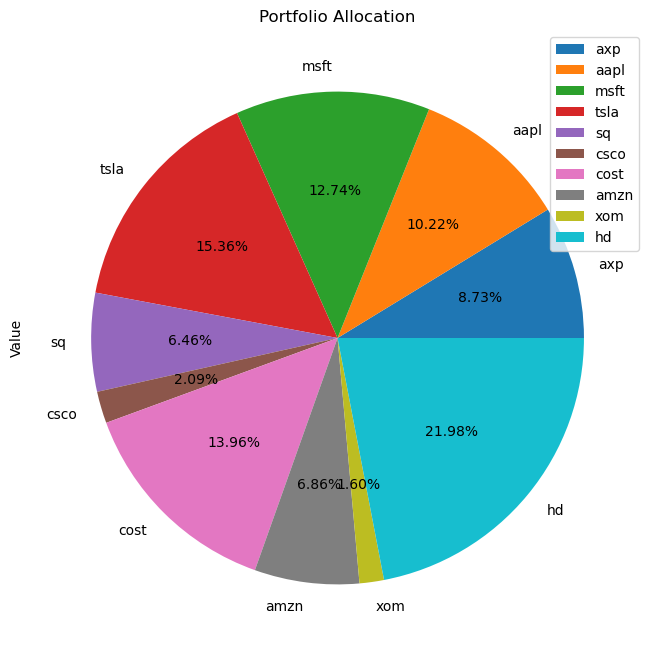

In [41]:
portfolio_df['Stock Holding Value'] = portfolio_df['Current Price'] * portfolio_df['Number of Shares']

total_portfolio_value = portfolio_df['Stock Holding Value'].sum().round(2)
print("Total Portfolio Value:", total_portfolio_value)

portfolio_df = portfolio_df.set_index('Stock Symbol')
each_stock_value = pd.DataFrame((portfolio_df['Current Price'] * portfolio_df['Number of Shares']).round(2))
percentage_of_portfolio = ((each_stock_value / total_portfolio_value) * 100).round(2)

portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))
plt.legend(loc='upper right')

# Save plot in the images folder.
plt.savefig('gui_images/portfolio_allocation.png')

In [43]:
portfolio_df

,Number of Shares,Current Price,Stock Holding Value
Stock Symbol,,,
axp,18.0,184.79,3326.22
aapl,20.0,194.68,3893.60
msft,13.0,373.54,4856.02
tsla,23.0,254.50,5853.50
sq,32.0,76.90,2460.80
csco,16.0,49.70,795.20
cost,8.0,665.16,5321.28
amzn,17.0,153.84,2615.28
xom,6.0,101.73,610.38


In [76]:
# Reset the index and turn ticker names into upper case letter.
portfolio_df = portfolio_df.reset_index()
portfolio_df['Stock Symbol'] = portfolio_df['Stock Symbol'].str.upper()


# Run if statement to get stock tickers and number of shares.
if 'Stock Symbol' in portfolio_df.columns:
    portfolio_tickers = portfolio_df['Stock Symbol']
if 'Number of Shares' in portfolio_df.columns:
    stock_shares = portfolio_df['Number of Shares']

# Convert stock tickers and number of shares into list .
portfolio_tickers =(portfolio_tickers).tolist()
stock_shares =(stock_shares).tolist()

# Iterates through each stock tickers, download data for each stock for defiend period and 
# store it in historical_data
historical_data = {}
for stock_symbol in portfolio_tickers:
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']

# Convert historical_data to a DataFrame
historical_data_df = pd.DataFrame(historical_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [77]:
# Fetch the closing data for Sp 500, Define period you wish to work with.
sp500_data = yf.download('^GSPC',  period="5y") 
sp500_closing_prices = sp500_data['Close']

# Convert to pandas DataFrame, Rename cloumn name to SP500.
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']

#  Calculate daily retuns of the Market and drop na.
sp500_returns = sp500_closing_prices.pct_change().dropna()

# Convert historical data of portfolio to pandas DataFrame and Calculate daily retuns of portfolio and drop na. 
portfolio_returns = historical_data_df.pct_change().dropna()

# Combine market and portfolio returns to one DataFrame.
combined_returns = pd.merge(sp500_returns, portfolio_returns, on='Date')
combined_returns

[*********************100%%**********************]  1 of 1 completed


,SP500,AXP,AAPL,MSFT,TSLA,SQ,CSCO,COST,AMZN,XOM,HD
Date,,,,,,,,,,,
2018-12-26,0.049594,0.048492,0.070422,0.068310,0.103930,0.090694,0.054369,0.045476,0.094452,0.047779,0.064120
2018-12-27,0.008563,0.008951,-0.006490,0.006166,-0.030544,0.015004,0.010360,0.012334,-0.006295,0.004371,0.012123
2018-12-28,-0.001242,-0.002746,0.000512,-0.007808,0.056116,-0.004987,-0.003263,0.004774,0.011207,-0.011169,-0.000587
2018-12-31,0.008492,0.009532,0.009665,0.011754,-0.003205,0.003938,0.013093,0.008266,0.016204,0.000293,0.009400
2019-01-02,0.001268,0.003777,0.001141,-0.004430,-0.068149,0.019790,-0.008770,0.005154,0.024741,0.021997,0.003434
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,0.004528,0.012465,-0.008503,0.005179,-0.005602,-0.004447,0.007419,0.034031,0.027339,0.007433,-0.009011
2023-12-19,0.005866,0.016360,0.005360,0.001637,0.020390,0.046427,-0.001194,-0.005138,-0.001817,0.013182,0.003592
2023-12-20,-0.014684,-0.027456,-0.010714,-0.007073,-0.039188,-0.015522,-0.007573,-0.024700,-0.010859,-0.016701,-0.009686


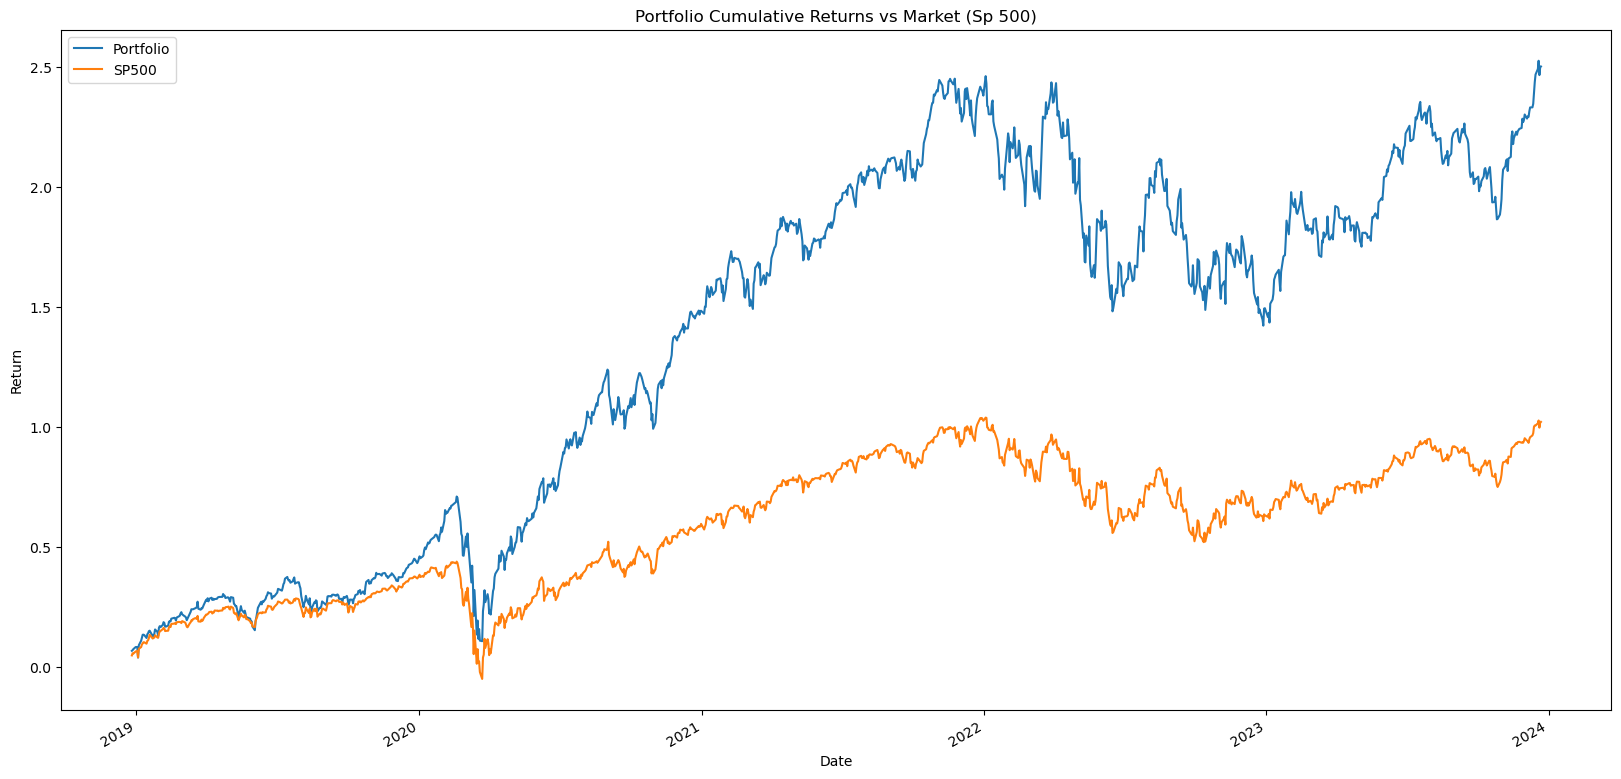

In [78]:
# Calculate the average returns of the portfolio and 
# cumulative returns of the portfolio and then plot it.
portfolio_average_returns = portfolio_returns.mean(axis=1)
portfolio_cumulative_returns = (1 + portfolio_average_returns).cumprod() - 1
ax = portfolio_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
# Calculate cumulative returns of th market and plot it against our portfolio.
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, 
                               label='SP500', 
                               legend=True)

# Save plot in the images folder.
plt.savefig('gui_images/cumulative_returns.png')

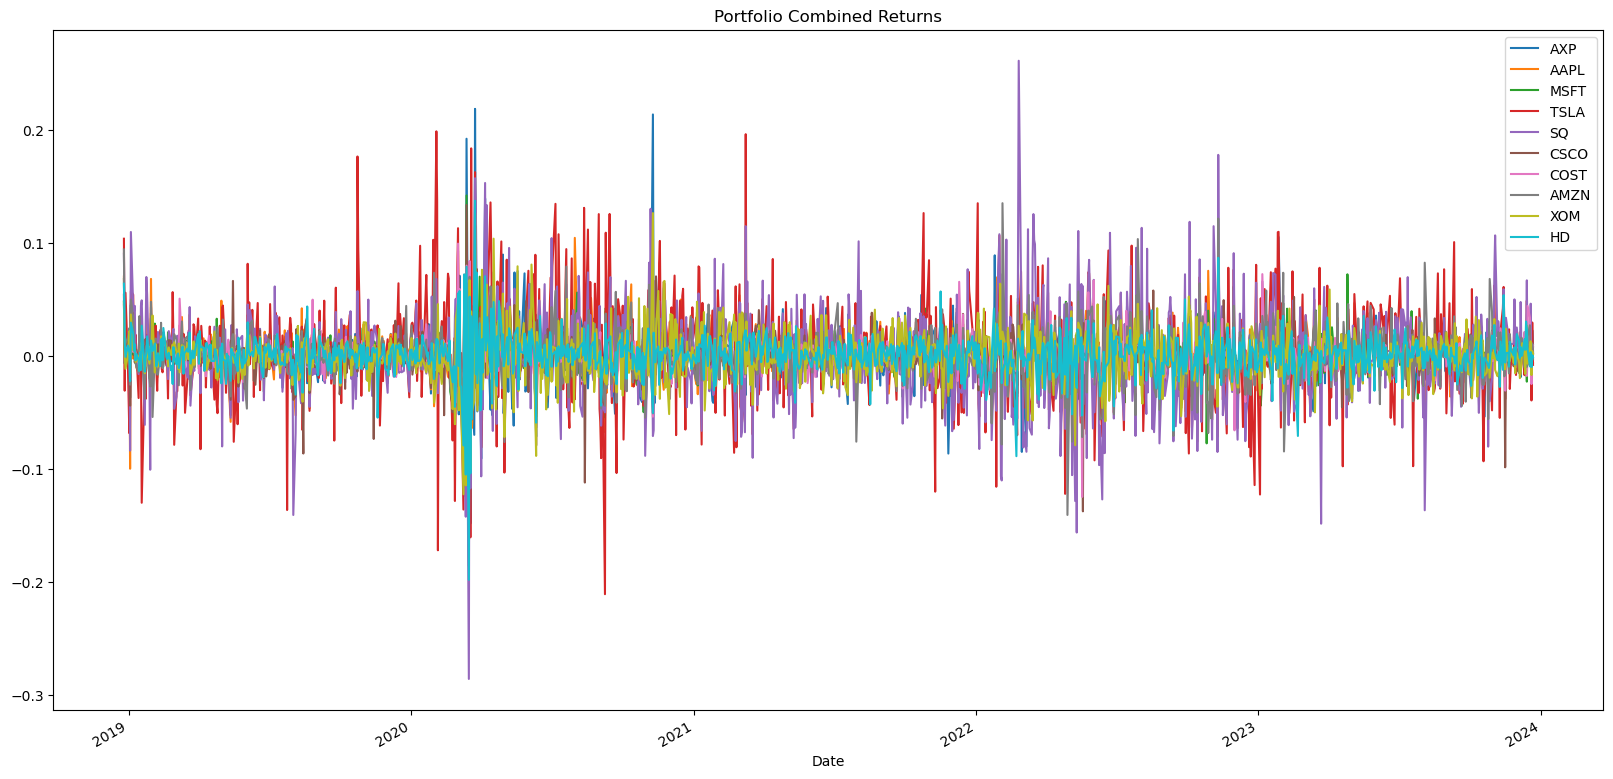

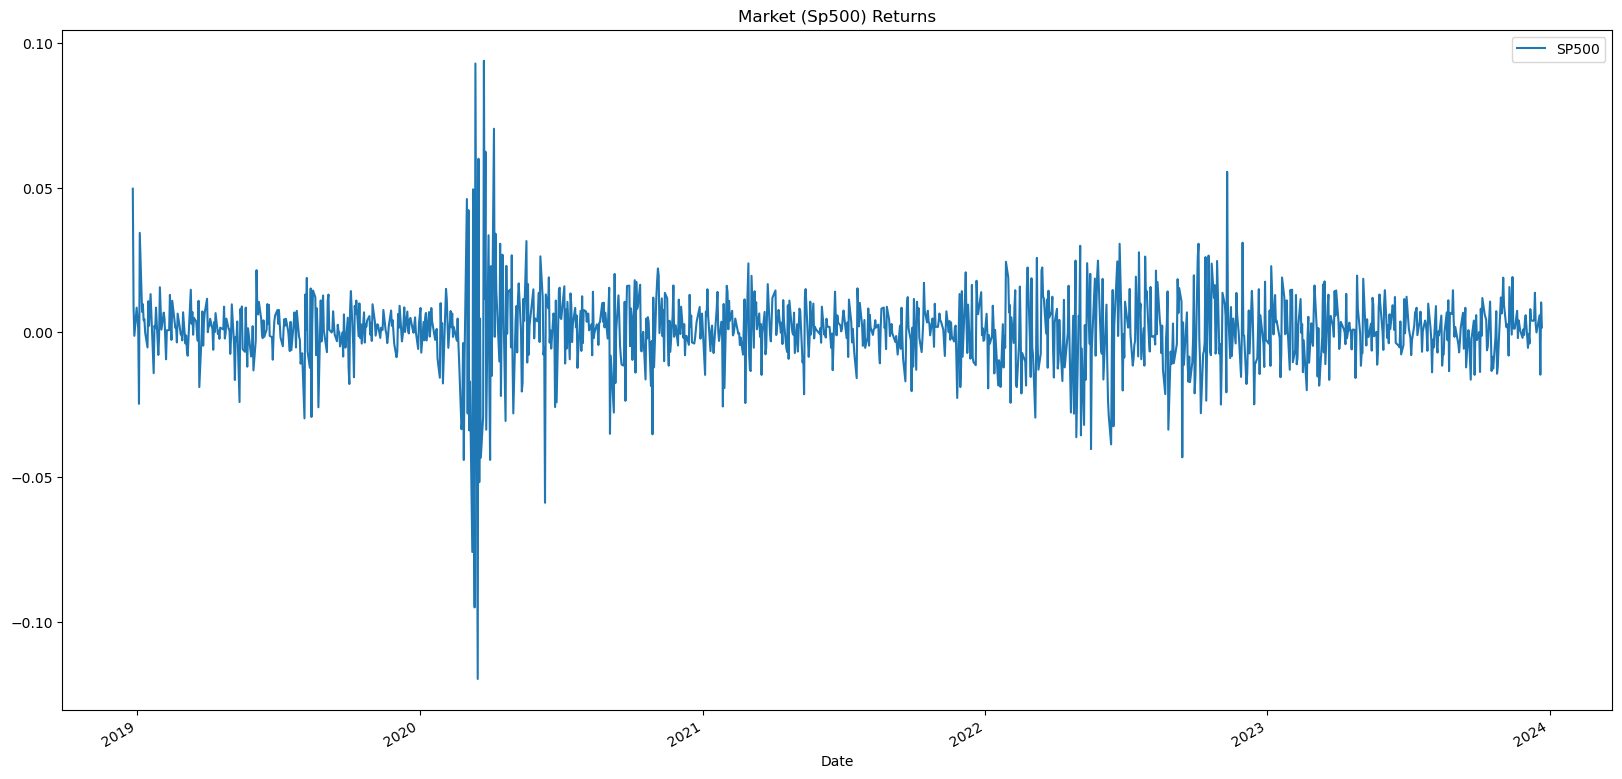

In [79]:
# Plot portfolio retuns and market retuns
portfolio_returns.plot(figsize=(20,10),
                       title='Portfolio Combined Returns', 
                       legend=True)
sp500_returns.plot(figsize=(20,10),
                   title='Market (Sp500) Returns', 
                   legend=True)

# Save plot in the images folder.
plt.savefig('gui_images/portfolio_returns.png')
plt.savefig('gui_images/sp500_returns.png')

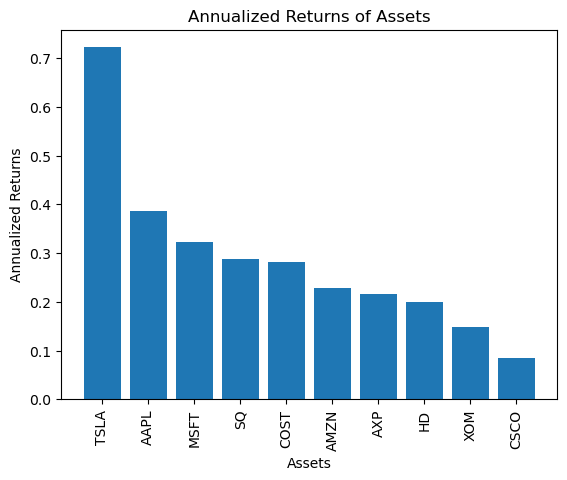

In [22]:
# define the risk free rate
risk_free_rate = 0.04/252 # annualized yield of 3-month Treasury bill divided by 252 trading days

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate


# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()


######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Calculate the stock risk
annual_stock_risk = portfolio_returns_std * math.sqrt(252)
annual_excess_risk = excess_returns_std * math.sqrt(252)

# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)


# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')

plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets')
plt.savefig('gui_images/annualized_returns.png')

In [23]:
# creat a dataframe to store the annual returns, annual risks, 
# annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)


,Expected Annual Returns,Expected Annual Risk,Expected Annual Excess Returns,Stock,Ratio
AAPL,0.385709,0.323793,7.674175,AAPL,1.191220
COST,0.281396,0.238131,2.211166,COST,1.181687
TSLA,0.722264,0.649399,16.572061,TSLA,1.112203
MSFT,0.323773,0.306542,4.169043,MSFT,1.056210
HD,0.200239,0.287294,4.765747,HD,0.696985
AMZN,0.228242,0.354802,3.840106,AMZN,0.643293
AXP,0.216579,0.378436,3.858420,AXP,0.572301
SQ,0.287246,0.636477,9.151867,SQ,0.451306
XOM,0.147909,0.344731,0.847456,XOM,0.429058
CSCO,0.084262,0.283853,1.308187,CSCO,0.296850


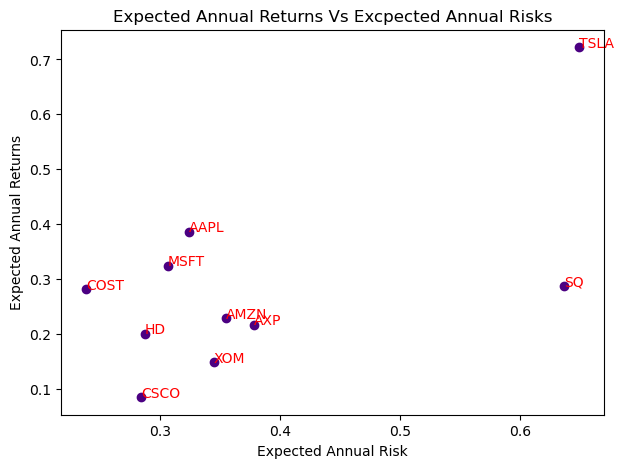

In [24]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')
plt.savefig('gui_images/portfolio_risk_return.png')

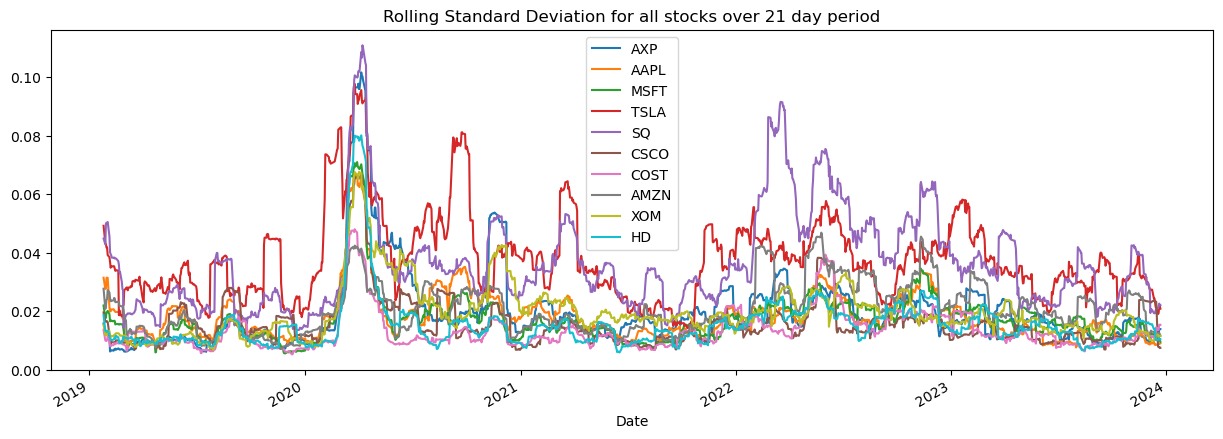

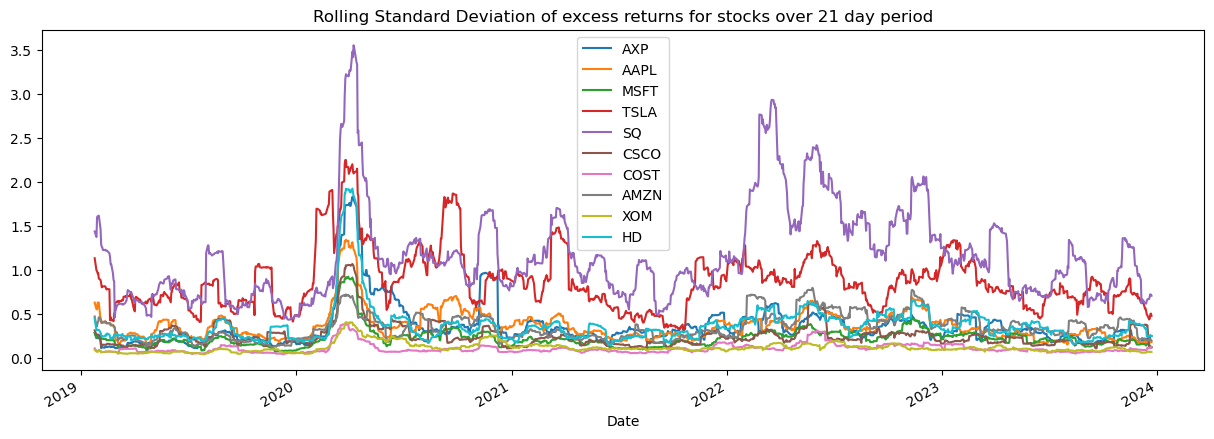

In [9]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()
excess_rolling_std = excess_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all stocks over 21 day period')
# Plotting excess
excess_rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation of excess returns for stocks over 21 day period')
plt.savefig('gui_images/standard_deviation.png')
plt.savefig('gui_images/excess_return.png')

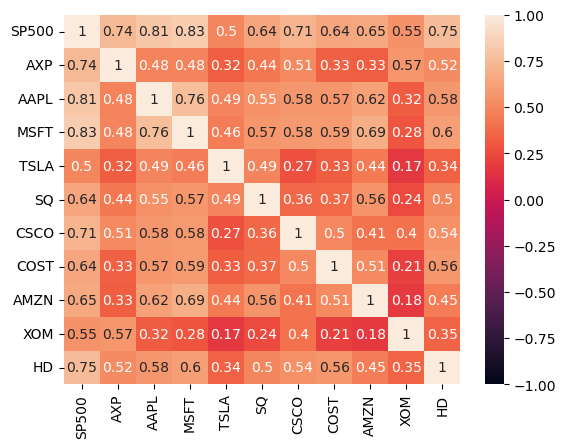

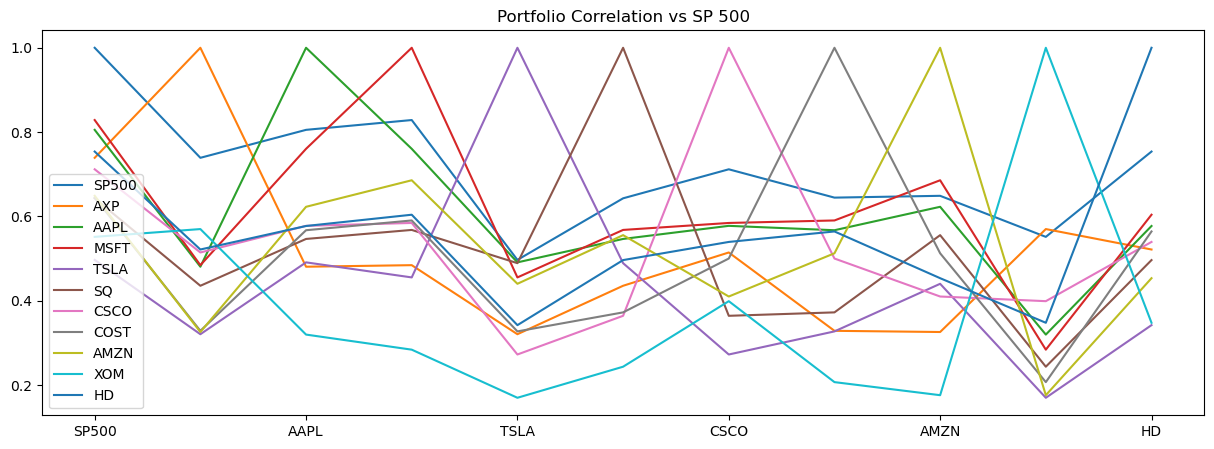

In [25]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
correlation_matrix.plot(figsize=(15,5), title='Portfolio Correlation vs SP 500')
plt.savefig('gui_images/portfolio_correlation.png')

In [36]:
portfolio_weights = [(percentage / 100) for percentage in portfolio_summary['Percentage'].tolist()]
portfolio_weights

[0.0873,
 0.10220000000000001,
 0.1274,
 0.1536,
 0.0646,
 0.0209,
 0.1396,
 0.06860000000000001,
 0.016,
 0.2198]

In [80]:
# Calculate portflio weight
portfolio_weights = [(percentage / 100) for percentage in portfolio_summary['Percentage'].tolist()]
portfolio_weights

# Create empty disctionaty for portfolio data to save all downloaded data.
# Run "for" loop to iterate through each stock ticker in the list and 
# download all data in defined period of time.
portfolio_data = {}
for stock_symbol in portfolio_tickers:
    stock_data = yf.download(stock_symbol, period="5y")
    portfolio_data[stock_symbol] = stock_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [51]:
# Concatenate portfolio data, concatenate along the columns and asign keys for each stock
portfolio_data_df = pd.concat(portfolio_data.values(),  axis=1, keys=portfolio_data.keys())

# Change column names to upper case for tickers and lower case for definition
portfolio_data_df.columns = portfolio_data_df.columns.map(lambda x: (x[0].upper(), x[1].lower()))
portfolio_data_df

AXP                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2018-12-24   90.739998   91.550003   89.500000   89.500000   83.331596   
2018-12-26   89.849998   93.889999   89.050003   93.839996   87.372459   
2018-12-27   92.360001   94.680000   91.260002   94.680000   88.154572   
2018-12-28   95.400002   95.650002   93.949997   94.419998   87.912491   
2018-12-31   95.129997   95.610001   94.300003   95.320000   88.750465   
...                ...         ...         ...         ...         ...   
2023-12-18  181.380005  182.839996  181.029999  182.759995  182.759995   
2023-12-19  183.210007  185.770004  183.190002  185.750000  185.750000   
2023-12-20  185.350006  185.649994  180.539993  180.649994  180.649994   
2023-12-21  181.830002  185.210007  181.830002  184.789993  184.789993   
2023-12-22  185.639999  186.369995  184.630005  185.570007  185.570007   

                           AAPL                                      ...  \
             volume        open        high         low       close  ...   
Date                                                                 ...   
2018-12-24  3190900   37.037498   37.887501   36.647499   36.707500  ...   
2018-12-26  5383700   37.075001   39.307499   36.680000   39.292500  ...   
2018-12-27  4226600   38.959999   39.192501   37.517502   39.037498  ...   
2018-12-28  3225100   39.375000   39.630001   38.637501   39.057499  ...   
2018-12-31  2821100   39.632500   39.840000   39.119999   39.435001  ...   
...             ...         ...         ...         ...         ...  ...   
2023-12-18  2814400  196.089996  196.630005  194.389999  195.889999  ...   
2023-12-19  3978300  196.160004  196.949997  195.889999  196.940002  ...   
2023-12-20  4020700  196.899994  197.679993  194.830002  194.830002  ...   
2023-12-21  3496800  196.100006  197.080002  193.500000  194.679993  ...   
2023-12-22  2781600  195.179993  195.410004  192.970001  193.600006  ...   

                   XOM                                            HD  \
                   low       close   adj close    volume        open   
Date                                                                   
2018-12-24   65.440002   65.510002   50.725842  14262800  160.160004   
2018-12-26   64.650002   68.639999   53.149475  24887700  159.460007   
2018-12-27   66.080002   68.940002   53.381767  22077000  166.440002   
2018-12-28   67.820000   68.169998   52.785530  19710600  171.220001   
2018-12-31   67.660004   68.190002   52.801029  15807000  171.470001   
...                ...         ...         ...       ...         ...   
2023-12-18  101.519997  101.650002  101.650002  21610400  353.709991   
2023-12-19  101.790001  102.989998  102.989998  18904700  351.459991   
2023-12-20  101.129997  101.269997  101.269997  20988900  351.000000   
2023-12-21  100.809998  101.730003  101.730003  19250900  351.869995   
2023-12-22  101.820000  101.910004  101.910004  12921800  349.040009   

                                                                     
                  high         low       close   adj close   volume  
Date                                                                 
2018-12-24  161.399994  158.089996  158.139999  139.814987  4547400  
2018-12-26  168.279999  159.440002  168.279999  148.779953  6141500  
2018-12-27  170.460007  163.360001  170.320007  150.583603  5069300  
2018-12-28  173.119995  168.600006  170.220001  150.495178  4552000  
2018-12-31  173.240005  170.649994  171.820007  151.909790  4206000  
...                ...         ...         ...         ...      ...  
2023-12-18  354.920013  350.320007  350.809998  350.809998  4420500  
2023-12-19  352.959991  350.399994  352.070007  352.070007  4654700  
2023-12-20  354.769989  348.309998  348.660004  348.660004  3259500  
2023-12-21  352.250000  347.000000  348.970001  348.970001  2794200 

In [81]:
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = portfolio_data_df,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

# Calculate daily return for portfolio and add name column 
MC_10years.portfolio_data.dropna()

AXP                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2018-12-26   89.849998   93.889999   89.050003   93.839996   87.372459   
2018-12-27   92.360001   94.680000   91.260002   94.680000   88.154572   
2018-12-28   95.400002   95.650002   93.949997   94.419998   87.912491   
2018-12-31   95.129997   95.610001   94.300003   95.320000   88.750465   
2019-01-02   93.910004   96.269997   93.769997   95.680000   89.085663   
...                ...         ...         ...         ...         ...   
2023-12-18  181.380005  182.839996  181.029999  182.759995  182.759995   
2023-12-19  183.210007  185.770004  183.190002  185.750000  185.750000   
2023-12-20  185.350006  185.649994  180.539993  180.649994  180.649994   
2023-12-21  181.830002  185.210007  181.830002  184.789993  184.789993   
2023-12-22  185.639999  186.369995  184.630005  185.570007  185.570007   

                                        AAPL                          ...  \
             volume daily_return        open        high         low  ...   
Date                                                                  ...   
2018-12-26  5383700     0.048492   37.075001   39.307499   36.680000  ...   
2018-12-27  4226600     0.008951   38.959999   39.192501   37.517502  ...   
2018-12-28  3225100    -0.002746   39.375000   39.630001   38.637501  ...   
2018-12-31  2821100     0.009532   39.632500   39.840000   39.119999  ...   
2019-01-02  4175400     0.003777   38.722500   39.712502   38.557499  ...   
...             ...          ...         ...         ...         ...  ...   
2023-12-18  2814400     0.012465  196.089996  196.630005  194.389999  ...   
2023-12-19  3978300     0.016360  196.160004  196.949997  195.889999  ...   
2023-12-20  4020700    -0.027456  196.899994  197.679993  194.830002  ...   
2023-12-21  3496800     0.022917  196.100006  197.080002  193.500000  ...   
2023-12-22  2781600     0.004221  195.179993  195.410004  192.970001  ...   

                   XOM                                 HD              \
             adj close    volume daily_return        open        high   
Date                                                                    
2018-12-26   53.149475  24887700     0.047779  159.460007  168.279999   
2018-12-27   53.381767  22077000     0.004371  166.440002  170.460007   
2018-12-28   52.785530  19710600    -0.011169  171.220001  173.119995   
2018-12-31   52.801029  15807000     0.000293  171.470001  173.240005   
2019-01-02   53.962509  16727200     0.021997  169.710007  173.179993   
...                ...       ...          ...         ...         ...   
2023-12-18  101.650002  21610400     0.007433  353.709991  354.920013   
2023-12-19  102.989998  18904700     0.013182  351.459991  352.959991   
2023-12-20  101.269997  20988900    -0.016701  351.000000  354.769989   
2023-12-21  101.730003  19250900     0.004542  351.869995  352.250000   
2023-12-22  101.910004  12921800     0.001769  349.040009  351.339996   

                                                                      
                   low       close   adj close   volume daily_return  
Date                                                                  
2018-12-26  159.440002  168.279999  148.779953  6141500     0.064120  
2018-12-27  163.360001  170.320007  150.583603  5069300     0.012123  
2018-12-28  168.600006  170.220001  150.495178  4552000    -0.000587  
2018-12-31  170.649994  171.820007  151.909790  4206000     0.009400  
2019-01-02  169.050003  172.410004  152.431412  4242900     0.003434  
...                ...         ...         ...      ...          ...  
2023-12-18  350.320007  350.809998  350.809998  4420500    -0.009011  
2023-12-19  350.399994  352.070007  352.070007  4654700     0.003592  
2023-12-20  348.309998  348.660004  348.660004  3259500    -0.009686  
2023-12-21  347.000000  348.

In [82]:
# Run monte carlo simulation
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005532,1.012164,0.999007,0.997932,0.989336,0.998586,1.002159,1.006530,1.001006,1.010592,...,0.999265,1.000670,1.013819,1.005724,1.006823,0.995975,1.005217,1.002930,0.981838,1.014840
2,1.009416,1.030446,1.004660,0.993691,0.989690,1.000289,1.014077,1.002612,0.988541,1.011467,...,1.014755,0.996921,1.011655,1.005481,1.002118,1.007281,1.001407,1.001251,0.987149,1.024950
3,1.004275,1.034187,1.009286,0.985499,0.987071,1.000885,1.004675,0.992543,0.980718,1.008149,...,1.025441,0.989352,1.011334,1.014804,1.006903,1.009498,1.011918,1.011619,0.979815,1.023437
4,1.018316,1.028436,0.996407,0.989130,1.010047,0.997213,1.005878,0.983143,0.979735,1.012732,...,1.049970,0.981741,1.001596,1.013402,1.011692,1.001695,1.004332,1.018685,0.994102,1.033599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,19.887294,21.552372,26.617451,16.076689,40.868401,81.571176,10.350340,41.268717,6.308669,41.922448,...,53.798073,10.598104,24.008607,12.088738,23.552068,14.379296,21.420268,18.259653,28.668895,17.203153
2517,19.632280,21.611852,27.004799,15.964925,40.272552,80.539576,10.357542,41.555777,6.246988,42.120428,...,53.684954,10.652591,24.050505,11.993669,23.385814,14.367101,21.472361,18.090008,28.433036,17.292974
2518,19.286777,22.034637,26.732939,16.057726,40.005543,80.197157,10.385956,41.164748,6.196241,41.746097,...,53.136237,10.743948,24.136324,12.165075,23.354576,14.226022,21.273420,18.178039,28.428757,17.328403
2519,18.896563,22.018758,27.155277,15.918398,39.997533,80.175458,10.434847,40.925648,6.223672,41.612285,...,52.705061,10.718302,23.496188,12.279031,23.386328,14.194622,21.153865,18.024975,28.255588,17.124286


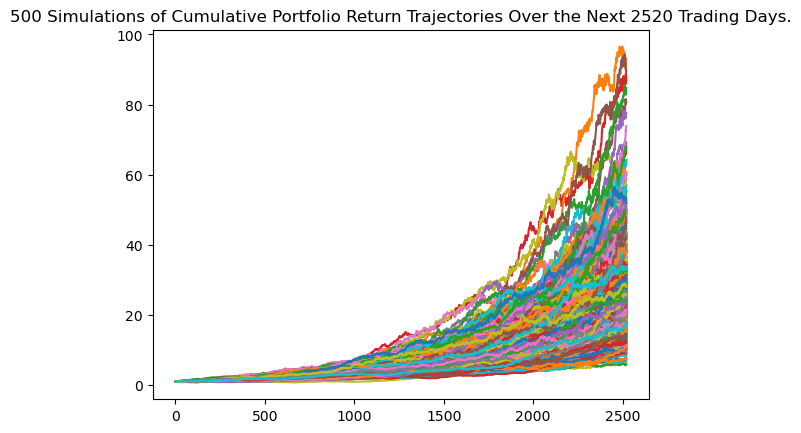

In [84]:
# Plot simulation outcomes 
line_plot = MC_10years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("gui_images/Monte_Carlo_10_year", bbox_inches="tight")

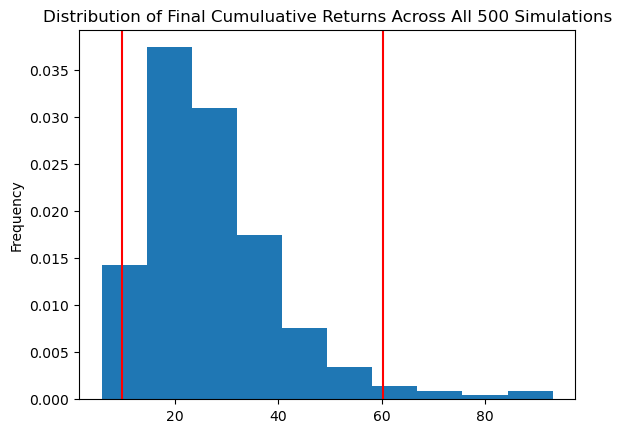

In [85]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_10years.plot_distribution()

# Save the plot for future usage
distribution_plot.get_figure().savefig('gui_images/Monte_Carlo_10year_dist_plot.png',bbox_inches='tight')

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MC_summary)

count           500.000000
mean             27.460994
std              13.236544
min               5.901612
25%              18.916983
50%              24.950010
75%              33.254725
max              93.077886
95% CI Lower      9.842446
95% CI Upper     60.334166
Name: 2520, dtype: float64


In [88]:
# Set initial investment
initial_investment_10year = total_portfolio_value

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes.
ci_lower_ten = round(MC_summary[8]*initial_investment_10year,2)
ci_upper_ten = round(MC_summary[9]*initial_investment_10year,2)
ci_average_ten = round((ci_lower_ten + ci_upper_ten)/2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")
print(f" On average ${ci_average_ten}")

There is a 95% chance that an initial investment of $38107.56 in the portfolio over the next 10 years will end within in the range of $367614.26 and $2101883.17
 On average $1337129.73


In [89]:
# Calculate annual return and annual percetage return on average. 
annual_return_10 = ((ci_average_ten - initial_investment_10year) / 10)
annual_percent_10 = annual_return_10 / initial_investment_10year


print(f"Annual Percent Change (10 years): {annual_percent_10 * 100:.2f}%")

Annual Percent Change (10 years): 340.88%
